## Telecom Churn Case Study

### Step 1: Understand and Explore the Data

In [22]:
# Basic libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # For building models
from sklearn.linear_model import LogisticRegression  # For logistic regression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve  # For evaluation metrics

# Handling class imbalance
from imblearn.over_sampling import SMOTE  # For synthetic oversampling of minority class

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')


In [23]:
# Importing all datasets
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [24]:
# Let's check the dimensions of the dataframe
churn_data.shape

(99999, 226)

In [25]:
# let's look at the statistical aspects of the dataframe
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [26]:
# Checking for null values
print("Null values in each column:")
print(churn_data.isnull().sum())

Null values in each column:
mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64


In [27]:
# Percentage of missing values in each column
missing_percentage = churn_data.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage[missing_percentage > 0])


Percentage of missing values in each column:
loc_og_t2o_mou           1.018010
std_og_t2o_mou           1.018010
loc_ic_t2o_mou           1.018010
last_date_of_month_7     0.601006
last_date_of_month_8     1.100011
                          ...    
night_pck_user_9        74.077741
fb_user_6               74.846748
fb_user_7               74.428744
fb_user_8               73.660737
fb_user_9               74.077741
Length: 166, dtype: float64


In [28]:
# Calculate the percentage of null values for each column
null_percentage = churn_data.isnull().mean() * 100

# Filter columns with more than 70% null values
high_null_columns = null_percentage[null_percentage > 70]

# Display columns with more than 70% null values
print("Columns with more than 70% null values:")
print(high_null_columns)


Columns with more than 70% null values:
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7 

In [29]:
churn_data.shape

(99999, 226)

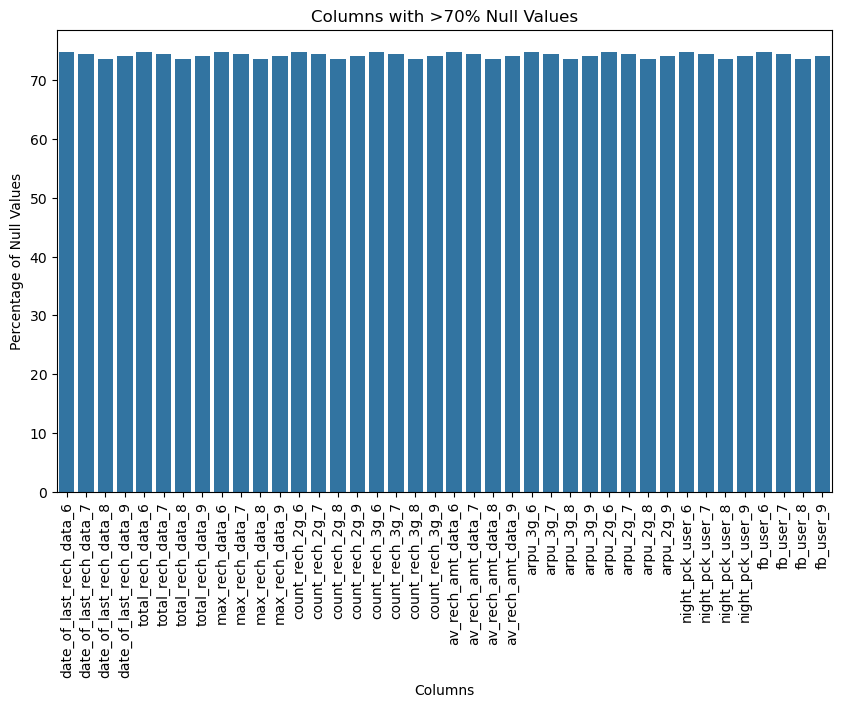

In [30]:
# Plotting the columns with more than 70% null values
plt.figure(figsize=(10, 6))
sns.barplot(x=high_null_columns.index, y=high_null_columns.values)
plt.xticks(rotation=90)
plt.title("Columns with >70% Null Values")
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.show()

### Step 2: Data Cleaning

In [31]:
# Let's first drop the mobile_number and the circle_id column as they are completely use less for our prediction.
# Columns to remove
columns_to_remove = ['mobile_number', 'circle_id']  # Add any additional irrelevant columns here

# Drop the columns
churn_data = churn_data.drop(columns=columns_to_remove, axis=1)

# Verify the dataset after removal
print("Remaining columns in the dataset:")
print(churn_data.columns)


Remaining columns in the dataset:
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=224)


In [32]:

print(f"Dataset shape after column removal: {churn_data.shape}")

Dataset shape after column removal: (99999, 224)


In [33]:
# Drop columns with more than 70% null values
data = churn_data.drop(columns=high_null_columns.index)

# Verify the shape of the dataset after dropping columns
print(f"Shape of dataset after dropping columns: {data.shape}")

Shape of dataset after dropping columns: (99999, 184)


In [34]:
# Step 1: Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Step 2: Check missing value percentages for numerical and categorical columns
numerical_missing = data[numerical_cols].isnull().mean() * 100
categorical_missing = data[categorical_cols].isnull().mean() * 100

# Step 3: Filter columns with missing values
numerical_missing_cols = numerical_missing[numerical_missing > 0]
categorical_missing_cols = categorical_missing[categorical_missing > 0]

# Display missing value percentages
print("Numerical columns with missing values:")
print(numerical_missing_cols)

print("\nCategorical columns with missing values:")
print(categorical_missing_cols)


Numerical columns with missing values:
loc_og_t2o_mou    1.018010
std_og_t2o_mou    1.018010
loc_ic_t2o_mou    1.018010
onnet_mou_6       3.937039
onnet_mou_7       3.859039
                    ...   
isd_ic_mou_9      7.745077
ic_others_6       3.937039
ic_others_7       3.859039
ic_others_8       5.378054
ic_others_9       7.745077
Length: 119, dtype: float64

Categorical columns with missing values:
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
date_of_last_rech_6     1.607016
date_of_last_rech_7     1.767018
date_of_last_rech_8     3.622036
date_of_last_rech_9     4.760048
dtype: float64


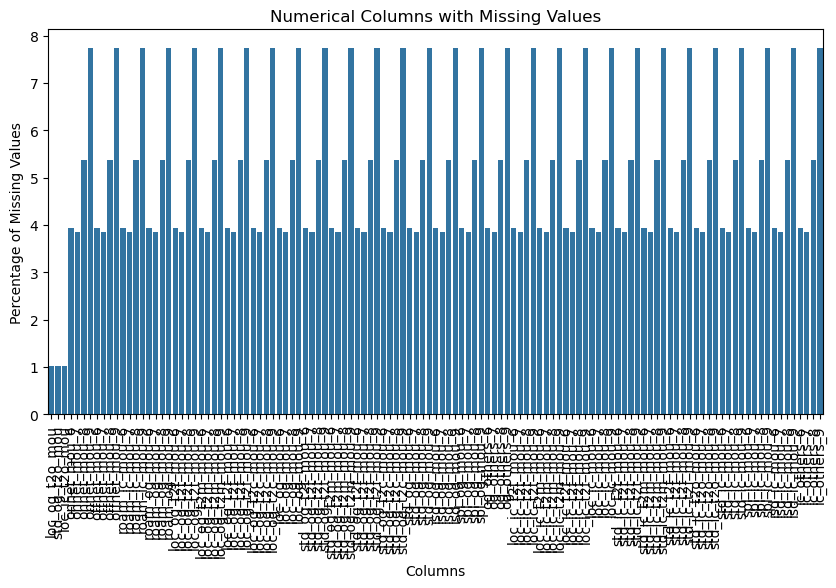

In [35]:
# Bar plot for missing numerical data
plt.figure(figsize=(10, 5))
sns.barplot(x=numerical_missing_cols.index, y=numerical_missing_cols.values)
plt.title("Numerical Columns with Missing Values")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=90)
plt.show()


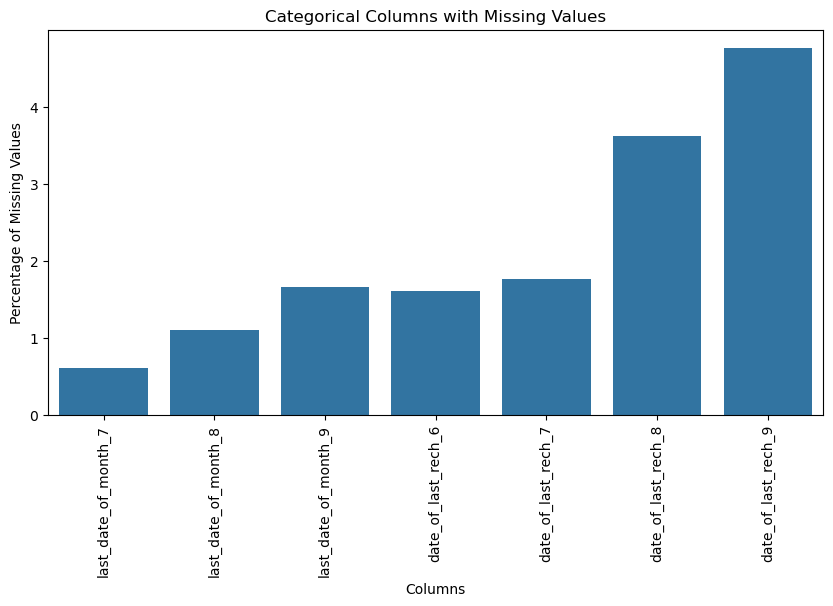

In [36]:
# Bar plot for missing categorical data
plt.figure(figsize=(10, 5))
sns.barplot(x=categorical_missing_cols.index, y=categorical_missing_cols.values)
plt.title("Categorical Columns with Missing Values")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=90)
plt.show()

In [37]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_columns)

# Percentage of missing values
missing_percentage = (missing_columns / len(churn_data)) * 100
print("\nPercentage of missing values in these columns:\n", missing_percentage)


Columns with missing values:
 loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_7     601
last_date_of_month_8    1100
                        ... 
ic_others_9             7745
date_of_last_rech_6     1607
date_of_last_rech_7     1767
date_of_last_rech_8     3622
date_of_last_rech_9     4760
Length: 126, dtype: int64

Percentage of missing values in these columns:
 loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
                          ...   
ic_others_9             7.745077
date_of_last_rech_6     1.607016
date_of_last_rech_7     1.767018
date_of_last_rech_8     3.622036
date_of_last_rech_9     4.760048
Length: 126, dtype: float64


In [39]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_columns)

# Percentage of missing values
missing_percentage = (missing_columns / len(churn_data)) * 100
print("\nPercentage of missing values in these columns:\n", missing_percentage)

Columns with missing values:
 loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_7     601
last_date_of_month_8    1100
                        ... 
ic_others_9             7745
date_of_last_rech_6     1607
date_of_last_rech_7     1767
date_of_last_rech_8     3622
date_of_last_rech_9     4760
Length: 126, dtype: int64

Percentage of missing values in these columns:
 loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
                          ...   
ic_others_9             7.745077
date_of_last_rech_6     1.607016
date_of_last_rech_7     1.767018
date_of_last_rech_8     3.622036
date_of_last_rech_9     4.760048
Length: 126, dtype: float64


In [40]:
# Impute numerical columns with the median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

In [41]:
# Impute categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

In [42]:
# Drop columns with more than 70% missing values
threshold = 0.7
columns_to_drop = missing_percentage[missing_percentage > threshold * 100].index
data.drop(columns=columns_to_drop, inplace=True)


In [43]:
# Check for any remaining missing values
print("Remaining missing values:\n", data.isnull().sum().sum())

Remaining missing values:
 0


### Step 4: Feature Engineering

In [44]:
# Average recharge amount in good phase (months 6 and 7)
data['avg_rech_amt_good'] = data[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)

# Total data usage in the good phase
data['total_data_good'] = data[['vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_7']].sum(axis=1)



In [45]:
# Change in recharge amount from month 6 to 7
data['rech_amt_change'] = data['total_rech_amt_7'] - data['total_rech_amt_6']

# Change in total data usage
data['data_usage_change'] = data['total_data_good'] - data[['vol_2g_mb_8', 'vol_3g_mb_8']].sum(axis=1)


In [46]:
# Ratio of outgoing to total calls
data['og_calls_ratio'] = data['total_og_mou_6'] / (data['total_og_mou_6'] + data['total_ic_mou_6'] + 1e-10)

# Ratio of 3G to total data usage
data['3g_data_ratio'] = data['vol_3g_mb_6'] / (data['vol_2g_mb_6'] + data['vol_3g_mb_6'] + 1e-10)


In [47]:
# Flag for no recharge in month 6
data['no_recharge_6'] = (data['total_rech_amt_6'] == 0).astype(int)

# Flag for no data usage in the good phase
data['no_data_usage'] = (data['total_data_good'] == 0).astype(int)

In [48]:
# Percent change in recharge amount from month 6 to 7
data['rech_amt_pct_change'] = ((data['total_rech_amt_7'] - data['total_rech_amt_6']) / 
                                (data['total_rech_amt_6'] + 1e-10)) * 100

In [49]:
data['rech_amt_pct_change']

0        -30.386740
1        418.918919
2         87.500000
3         34.782609
4         78.571429
            ...    
99994     83.333333
99995      0.000000
99996   -100.000000
99997     -6.036745
99998   -100.000000
Name: rech_amt_pct_change, Length: 99999, dtype: float64

#### Let's identify high value customers 
- High-value customers are defined as those with an average recharge amount above the 70th percentile for the good phase (months 6 and 7).

In [50]:
# Calculate 70th percentile of average recharge amount
threshold = data['avg_rech_amt_good'].quantile(0.7)

# Filter high-value customers
data = data[data['avg_rech_amt_good'] >= threshold]
print(f"Number of high-value customers: {data.shape[0]}")


Number of high-value customers: 30011


#### Let's Identify the churners as well
- Churners are defined as customers with no outgoing/incoming calls and no data usage in the churn phase (month 9).

In [51]:
# Tag churners
data['churn'] = ((data['total_ic_mou_9'] == 0) & 
                 (data['total_og_mou_9'] == 0) & 
                 (data['vol_2g_mb_9'] == 0) & 
                 (data['vol_3g_mb_9'] == 0)).astype(int)

In [54]:
data['churn']

7        1
8        0
13       0
16       0
17       0
        ..
99970    0
99974    0
99986    0
99988    0
99997    0
Name: churn, Length: 30011, dtype: int32

In [55]:
# Remove churn phase columns
churn_phase_cols = [col for col in data.columns if '_9' in col]
data.drop(columns=churn_phase_cols, inplace=True)


- Let's encode the categorical variables

In [56]:
# Display column names and their data types
print(data.dtypes)

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns in the dataset:", categorical_columns)


loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
last_date_of_month_7     object
                         ...   
3g_data_ratio           float64
no_recharge_6             int32
no_data_usage             int32
rech_amt_pct_change     float64
churn                     int32
Length: 150, dtype: object
Categorical columns in the dataset: Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')


In [57]:
data = pd.get_dummies(data, columns=['loc_og_t2o_mou'], drop_first=True)


In [58]:
data.head()

,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,avg_rech_amt_good,total_data_good,rech_amt_change,data_usage_change,og_calls_ratio,3g_data_ratio,no_recharge_6,no_data_usage,rech_amt_pct_change,churn
7,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,...,1185.0,0.00,-790,0.00,0.437643,0.0,0,1,-50.000000,1
8,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,...,519.0,1106.95,164,1094.98,0.830355,0.0,0,0,37.528604,0
13,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,...,380.0,0.00,-254,-0.02,0.483601,0.0,0,1,-50.098619,0
16,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,...,459.0,0.00,-222,0.00,0.487319,0.0,0,1,-38.947368,0
17,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,25.499,1185.91,9.28,...,408.0,0.00,-816,0.00,0.931505,0.0,0,1,-100.000000,0


In [59]:
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [65]:
data.head()

,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,date_of_last_rech_8_8/29/2014,date_of_last_rech_8_8/3/2014,date_of_last_rech_8_8/30/2014,date_of_last_rech_8_8/31/2014,date_of_last_rech_8_8/4/2014,date_of_last_rech_8_8/5/2014,date_of_last_rech_8_8/6/2014,date_of_last_rech_8_8/7/2014,date_of_last_rech_8_8/8/2014,date_of_last_rech_8_8/9/2014
7,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,...,False,False,False,False,False,False,False,False,False,False
8,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,...,False,False,True,False,False,False,False,False,False,False
13,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,...,False,False,True,False,False,False,False,False,False,False
16,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,...,False,False,False,False,False,False,False,False,False,False
17,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,...,False,False,False,False,False,False,False,False,False,False


In [66]:
# Identify columns with names indicating they are date-related
date_columns = [col for col in data.columns if 'date' in col.lower() or 'month' in col.lower()]
print("Date-related columns to be dropped:", date_columns)

Date-related columns to be dropped: ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'date_of_last_rech_6_6/10/2014', 'date_of_last_rech_6_6/11/2014', 'date_of_last_rech_6_6/12/2014', 'date_of_last_rech_6_6/13/2014', 'date_of_last_rech_6_6/14/2014', 'date_of_last_rech_6_6/15/2014', 'date_of_last_rech_6_6/16/2014', 'date_of_last_rech_6_6/17/2014', 'date_of_last_rech_6_6/18/2014', 'date_of_last_rech_6_6/19/2014', 'date_of_last_rech_6_6/2/2014', 'date_of_last_rech_6_6/20/2014', 'date_of_last_rech_6_6/21/2014', 'date_of_last_rech_6_6/22/2014', 'date_of_last_rech_6_6/23/2014', 'date_of_last_rech_6_6/24/2014', 'date_of_last_rech_6_6/25/2014', 'date_of_last_rech_6_6/26/2014', 'date_of_last_rech_6_6/27/2014', 'date_of_last_rech_6_6/28/2014', 'date_of_last_rech_6_6/29/2014', 'date_of_last_rech_6_6/3/2014', 'date_of_last_rech_6_6/30/2014', 'date_of_last_rech_6_6/4/2014', 'date_of_last_rech_6_6/5/2014', 'date_of_last_rech_6_6/6/2014', 'date_of_last_

In [67]:
# Drop the identified date-related columns
data.drop(columns=date_columns, inplace=True)

# Verify the columns are removed
print("Remaining columns:", data.columns)


Remaining columns: Index(['std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'avg_rech_amt_good', 'total_data_good', 'rech_amt_change',
       'data_usage_change', 'og_calls_ratio', '3g_data_ratio', 'no_recharge_6',
       'no_data_usage', 'rech_amt_pct_change', 'churn'],
      dtype='object', length=137)


#### let's do some feature scaling
- Scale numerical features to ensure all features are on a similar scale, especially for models like Logistic Regression or PCA.

In [68]:
#First let's keep a back up of our data incase of anything
data_backup = data.copy()

In [69]:
# Identify all numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude the target column 'churn'
numerical_columns = [col for col in numerical_columns if col != 'churn']
print("Numerical columns to scale:", numerical_columns)


Numerical columns to scale: ['std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_othe

In [70]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling to the selected numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Verify the scaled features
print(data[numerical_columns].head())


    std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7              0.0             0.0  0.110967  0.090525  0.119378     0.007841   
8              0.0             0.0  0.087944  0.067446  0.031406     0.056081   
13             0.0             0.0  0.091750  0.059734  0.044624     0.068019   
16             0.0             0.0  0.089687  0.062269  0.032871     0.006847   
17             0.0             0.0  0.098324  0.054710  0.028162     0.160764   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  ...  jul_vbc_3g  \
7      0.006703     0.004863      0.054223      0.058669  ...    0.002114   
8      0.043030     0.003262      0.011320      0.008341  ...    0.099355   
13     0.013287     0.049685      0.049425      0.012339  ...    0.000000   
16     0.009072     0.006567      0.035431      0.023765  ...    0.000267   
17     0.001138     0.000724      0.007371      0.000000  ...    0.000000   

    jun_vbc_3g  sep_vbc_3g  avg_rech_amt_good  tot

In [71]:
# Ensure 'churn' column is not scaled
print("First few rows of 'churn':")
print(data['churn'].head())

# Check descriptive statistics of scaled features
print(data[numerical_columns].describe())

First few rows of 'churn':
7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32
       std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7  \
count         30011.0         30011.0  30011.000000  30011.000000   
mean              0.0             0.0      0.094899      0.070054   
std               0.0             0.0      0.014762      0.012457   
min               0.0             0.0      0.000000      0.000000   
25%               0.0             0.0      0.087459      0.064022   
50%               0.0             0.0      0.091844      0.067482   
75%               0.0             0.0      0.098788      0.073058   
max               0.0             0.0      1.000000      1.000000   

             arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean       0.042931      0.040180      0.037347      0.024981      0.050099   
std        0.014273      0.062434      0.059034 

In [72]:
# Save the processed dataset
data.to_csv('processed_telecom_data.csv', index=False)

### Step 4: EDA and handling multi-colinearity

In [73]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                     std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
std_og_t2o_mou                  NaN             NaN       NaN       NaN   
loc_ic_t2o_mou                  NaN             NaN       NaN       NaN   
arpu_6                          NaN             NaN  1.000000  0.631581   
arpu_7                          NaN             NaN  0.631581  1.000000   
arpu_8                          NaN             NaN  0.570936  0.740811   
...                             ...             ...       ...       ...   
rech_amt_change                 NaN             NaN -0.326348  0.359543   
data_usage_change               NaN             NaN  0.163867  0.140706   
og_calls_ratio                  NaN             NaN  0.142738  0.036908   
3g_data_ratio                   NaN             NaN  0.123700  0.073309   
rech_amt_pct_change             NaN             NaN -0.093729  0.080583   

                       arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
std_og_t2o_mou            N

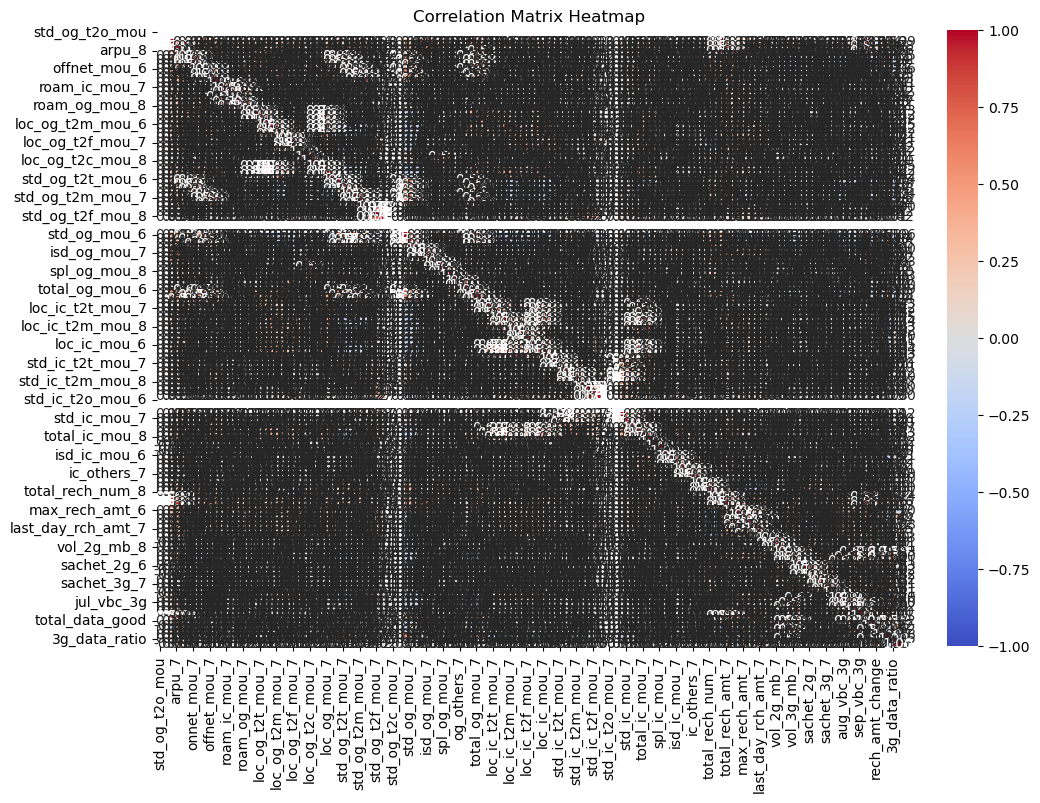

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [75]:
# Find highly correlated features
threshold = 0.8
high_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1.0)]
print("Highly correlated features (above threshold):")
print(high_corr)

Highly correlated features (above threshold):
                     std_og_t2o_mou  loc_ic_t2o_mou  arpu_6  arpu_7  arpu_8  \
std_og_t2o_mou                  NaN             NaN     NaN     NaN     NaN   
loc_ic_t2o_mou                  NaN             NaN     NaN     NaN     NaN   
arpu_6                          NaN             NaN     NaN     NaN     NaN   
arpu_7                          NaN             NaN     NaN     NaN     NaN   
arpu_8                          NaN             NaN     NaN     NaN     NaN   
...                             ...             ...     ...     ...     ...   
rech_amt_change                 NaN             NaN     NaN     NaN     NaN   
data_usage_change               NaN             NaN     NaN     NaN     NaN   
og_calls_ratio                  NaN             NaN     NaN     NaN     NaN   
3g_data_ratio                   NaN             NaN     NaN     NaN     NaN   
rech_amt_pct_change             NaN             NaN     NaN     NaN     NaN   

     

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Add a constant column for VIF calculation
X = data[numerical_columns].assign(constant=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column's VIF
vif_data = vif_data[vif_data['Feature'] != 'constant']

# Display VIF
print(vif_data)


                 Feature        VIF
0         std_og_t2o_mou        NaN
1         loc_ic_t2o_mou        NaN
2                 arpu_6  14.033119
3                 arpu_7  16.199320
4                 arpu_8  19.315861
..                   ...        ...
129      rech_amt_change        inf
130    data_usage_change        inf
131       og_calls_ratio   2.669907
132        3g_data_ratio   1.837681
133  rech_amt_pct_change   1.439822

[134 rows x 2 columns]


In [78]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
principal_components = pca.fit_transform(data[numerical_columns])

In [79]:
# Convert back to a DataFrame
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
data_pca = pd.DataFrame(data=principal_components, columns=pca_columns)
print(data_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.101889 -0.203976 -0.216377  0.075445  0.069268  0.032356 -0.257898   
1 -0.257889  0.200849 -0.121345 -0.116483  0.083671 -0.069265  0.072303   
2 -0.118809 -0.360839  0.143781  0.011944 -0.113536 -0.003771 -0.022630   
3 -0.145951 -0.102060 -0.274204 -0.047101  0.056453 -0.011861 -0.049829   
4 -0.300618  0.247028  0.023462 -0.148372  0.054281 -0.118014 -0.076801   

        PC8       PC9      PC10  ...      PC19      PC20      PC21      PC22  \
0 -0.125573 -0.075276  0.236439  ...  0.052285  0.027269 -0.036078 -0.110267   
1 -0.031090  0.021948  0.045868  ...  0.005273 -0.002728 -0.015320  0.010002   
2  0.097366  0.009254  0.017743  ... -0.024647 -0.008229  0.008789  0.008558   
3  0.002383  0.011420 -0.029509  ... -0.011185  0.005007 -0.002512 -0.006506   
4  0.124214  0.093543  0.004810  ... -0.001317 -0.037526 -0.068307 -0.005145   

       PC23      PC24      PC25      PC26      PC27      PC28  
0 -0

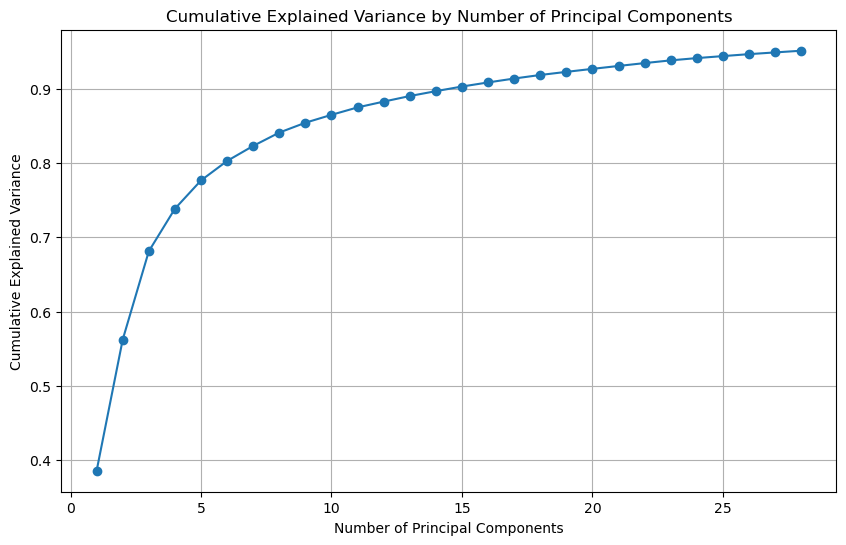

In [80]:
# Plot the cumulative explained variance
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


### Step 6: Model Building

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Fit a Random Forest to assess feature importance
X = data[numerical_columns]
y = data['churn']
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


              Feature  Importance
88     total_ic_mou_8    0.082757
58     total_og_mou_8    0.040071
103  total_rech_amt_8    0.039479
4              arpu_8    0.036116
106    max_rech_amt_8    0.027920
..                ...         ...
43   std_og_t2c_mou_8    0.000000
80   std_ic_t2o_mou_6    0.000000
81   std_ic_t2o_mou_7    0.000000
82   std_ic_t2o_mou_8    0.000000
0      std_og_t2o_mou    0.000000

[134 rows x 2 columns]


In [83]:
from sklearn.model_selection import train_test_split

# Split the data
X = data[numerical_columns]  # Features
y = data['churn']            # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (21007, 134)
Test set size: (9004, 134)


In [84]:
# Use PCA-transformed data for training and testing
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Build models using the transformed data
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_pca)


In [87]:
data.head()

,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,avg_rech_amt_good,total_data_good,rech_amt_change,data_usage_change,og_calls_ratio,3g_data_ratio,no_recharge_6,no_data_usage,rech_amt_pct_change,churn
7,0.0,0.0,0.110967,0.090525,0.119378,0.007841,0.006703,0.004863,0.054223,0.058669,...,0.021835,0.000000,0.387166,0.252819,0.437643,0.0,0,1,7.633588e-15,1
8,0.0,0.0,0.087944,0.067446,0.031406,0.056081,0.043030,0.003262,0.011320,0.008341,...,0.004025,0.015094,0.420115,0.271714,0.830355,0.0,0,0,2.099673e-14,0
13,0.0,0.0,0.091750,0.059734,0.044624,0.068019,0.013287,0.049685,0.049425,0.012339,...,0.000308,0.000000,0.405678,0.252818,0.483601,0.0,0,1,7.618531e-15,0
16,0.0,0.0,0.089687,0.062269,0.032871,0.006847,0.009072,0.006567,0.035431,0.023765,...,0.002420,0.000000,0.406783,0.252819,0.487319,0.0,0,1,9.321012e-15,0
17,0.0,0.0,0.098324,0.054710,0.028162,0.160764,0.001138,0.000724,0.007371,0.000000,...,0.001056,0.000000,0.386268,0.252819,0.931505,0.0,0,1,1.744960e-27,0


In [90]:
# Combine PCA components and select original features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select top PCA components
top_pca_components = pca.transform(X_train)[:, :5]  # Use top 5 components
important_features = X_train[['rech_amt_pct_change', 'avg_rech_amt_good','total_data_good','data_usage_change','og_calls_ratio','3g_data_ratio']]  # Example important features

# Combine
X_train_combined = np.hstack((top_pca_components, scaler.fit_transform(important_features)))
X_test_combined = np.hstack((pca.transform(X_test)[:, :5], scaler.transform(X_test[['rech_amt_pct_change', 'avg_rech_amt_good','total_data_good','data_usage_change','og_calls_ratio','3g_data_ratio']])))


In [95]:
# Check PCA parameters and properties
print("Number of Components Used:", pca.n_components_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Explained Variance (Eigenvalues):", pca.explained_variance_)
print("Singular Values:", pca.singular_values_)
print("Components (Principal Axes):", pca.components_)
print("Total Explained Variance (Cumulative):", sum(pca.explained_variance_ratio_))


Number of Components Used: 28
Explained Variance Ratio: [0.38543041 0.17678878 0.11900975 0.05729496 0.03815306 0.02624161
 0.0202811  0.01797169 0.01326565 0.0106311  0.0100401  0.00778985
 0.00750786 0.00658418 0.00622317 0.00552246 0.00527165 0.00476908
 0.00420663 0.00404594 0.00392022 0.00386632 0.00366026 0.00306618
 0.00269534 0.00262542 0.00233805 0.00228365]
Explained Variance (Eigenvalues): [0.15737048 0.07218251 0.04859145 0.02339342 0.01557782 0.0107144
 0.00828073 0.00733781 0.00541634 0.00434066 0.00409935 0.00318058
 0.00306544 0.00268831 0.00254091 0.00225481 0.0021524  0.00194721
 0.00171756 0.00165195 0.00160062 0.00157861 0.00149448 0.00125191
 0.0011005  0.00107195 0.00095462 0.00093241]
Singular Values: [68.72181658 46.54242304 38.18676918 26.49597267 21.62152537 17.93150982
 15.76403468 14.83939242 12.7492864  11.41328847 11.09151107  9.76981189
  9.59135036  8.98199026  8.73227822  8.22598618  8.03701646  7.64432287
  7.17941161  7.04095095  6.93070014  6.8828820

In [97]:
# Example after training PCA
from sklearn.decomposition import PCA

# Assuming `X_train_scaled` is the standardized data
pca = PCA(n_components=5)
pca.fit(X_train)

# Inspect the PCA parameters
print("Number of Components Used:", pca.n_components_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance (Cumulative):", sum(pca.explained_variance_ratio_))


Number of Components Used: 5
Explained Variance Ratio: [0.38885057 0.1762602  0.11867824 0.05744523 0.03879628]
Total Explained Variance (Cumulative): 0.780030526295522


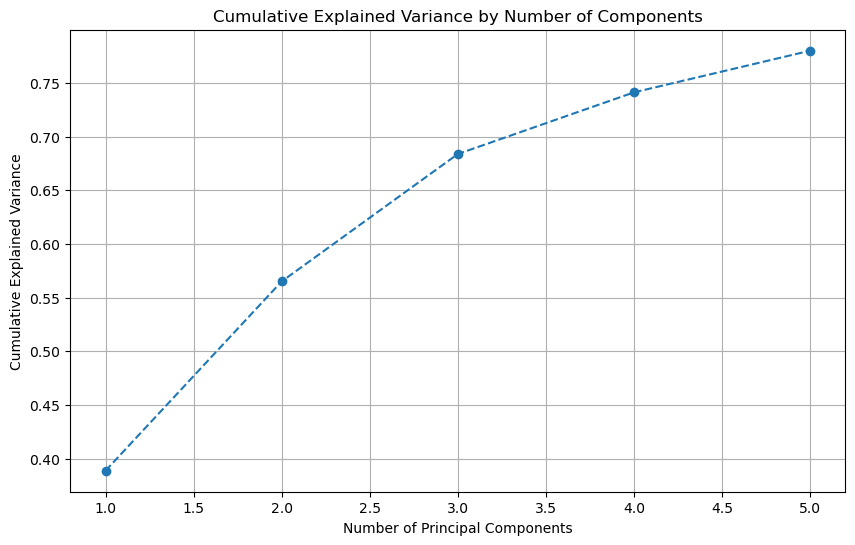

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


### Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])}")


              precision    recall  f1-score   support

           0       0.92      0.99      0.96      8231
           1       0.58      0.11      0.18       773

    accuracy                           0.92      9004
   macro avg       0.75      0.55      0.57      9004
weighted avg       0.89      0.92      0.89      9004

AUC-ROC: 0.8749670533714166


### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])}")


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8231
           1       0.76      0.47      0.58       773

    accuracy                           0.94      9004
   macro avg       0.86      0.73      0.77      9004
weighted avg       0.94      0.94      0.94      9004

AUC-ROC: 0.9202165856746722


In [101]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Training set size after SMOTE: {X_train_smote.shape}")

Training set size after SMOTE: (38374, 134)


In [102]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8231
           1       0.76      0.47      0.58       773

    accuracy                           0.94      9004
   macro avg       0.86      0.73      0.77      9004
weighted avg       0.94      0.94      0.94      9004

AUC-ROC: 0.9202165856746722


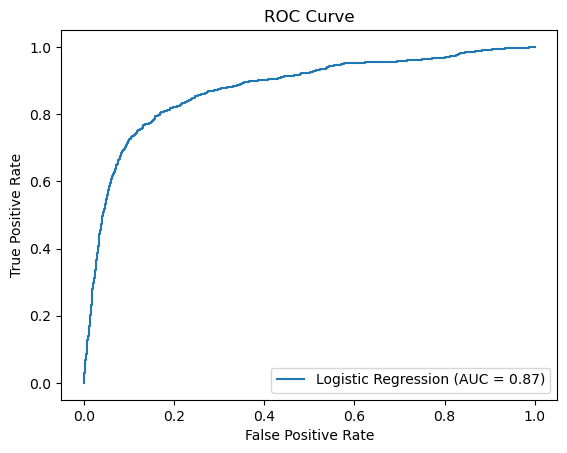

In [103]:
from sklearn.metrics import roc_curve, auc

# Get ROC curve for logistic regression
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


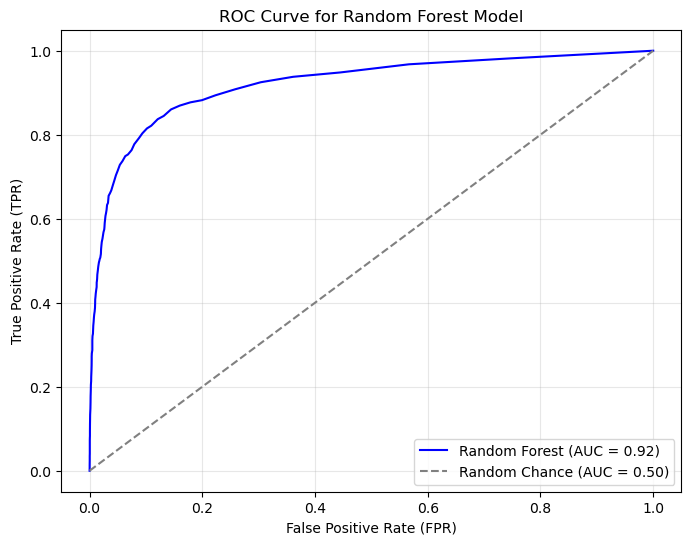

In [104]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Calculate the AUC score
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Chance (AUC = 0.50)")
plt.title("ROC Curve for Random Forest Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [105]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,  # Suppresses warning in newer versions
    eval_metric="logloss",   # Evaluation metric for binary classification
    random_state=42
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(f"AUC-ROC for XGBoost: {roc_auc_score(y_test, y_proba_xgb):.2f}")


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8231
           1       0.72      0.52      0.60       773

    accuracy                           0.94      9004
   macro avg       0.84      0.75      0.78      9004
weighted avg       0.94      0.94      0.94      9004

AUC-ROC for XGBoost: 0.93


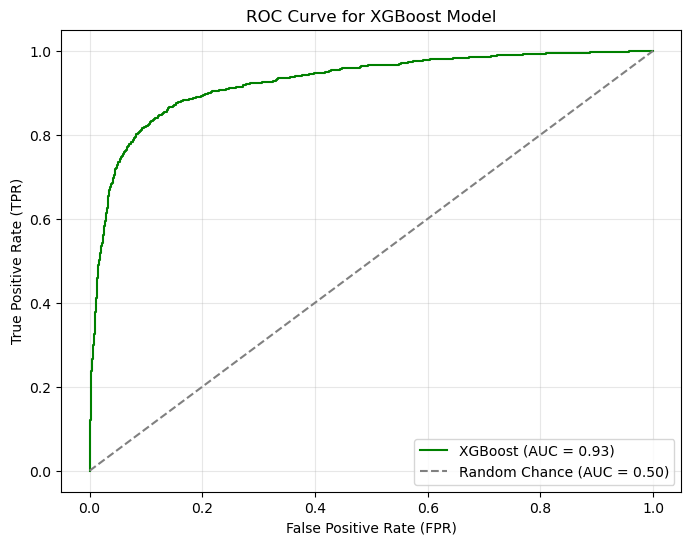

In [106]:
# Calculate the ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='green', label=f"XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb):.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Chance (AUC = 0.50)")
plt.title("ROC Curve for XGBoost Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


#### Let's do some hyperparameter tuning for increased model efficicany

In [107]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train final model with best parameters
xgb_best_model = grid_search.best_estimator_


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8231
           1       0.71      0.55      0.62       773

    accuracy                           0.94      9004
   macro avg       0.83      0.76      0.79      9004
weighted avg       0.94      0.94      0.94      9004

AUC-ROC for Tuned XGBoost: 0.93


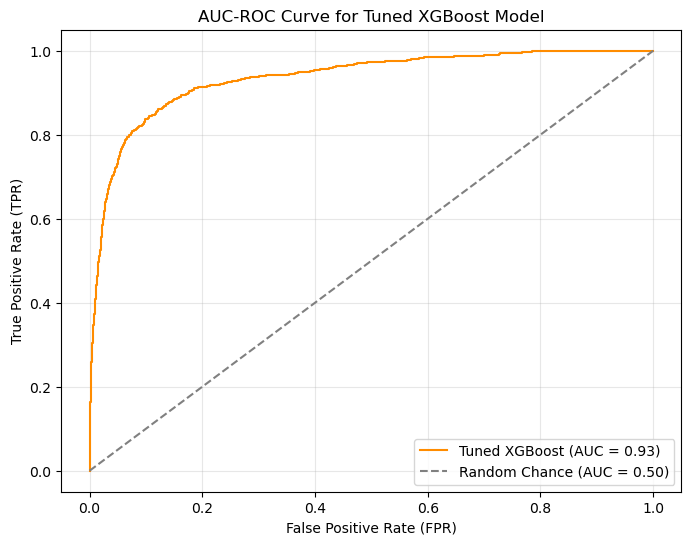

In [108]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Choose the best model (e.g., from RandomizedSearchCV)
best_xgb = xgb_best_model  # Or use best_xgb_grid if GridSearchCV was used

# Predict probabilities
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, best_xgb.predict(X_test)))

# Calculate AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC for Tuned XGBoost: {roc_auc:.2f}")

# Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f"Tuned XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Chance (AUC = 0.50)")
plt.title("AUC-ROC Curve for Tuned XGBoost Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


### Step 7: Analyze Feature Importance

<Figure size 1000x800 with 0 Axes>

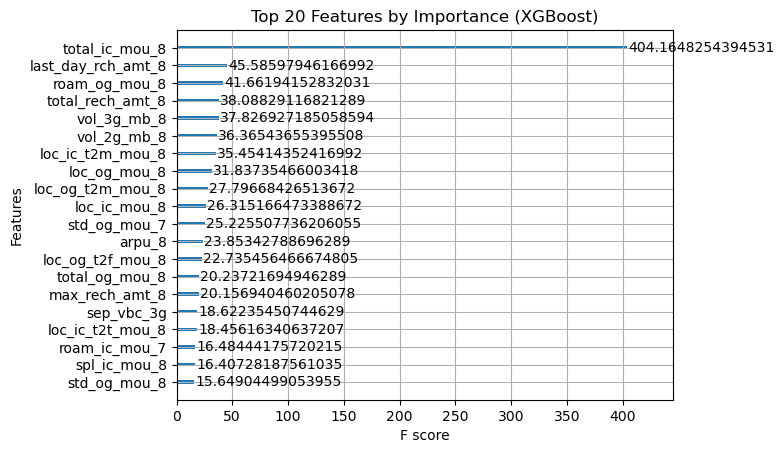

In [109]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(best_xgb, importance_type="gain", max_num_features=20)
plt.title("Top 20 Features by Importance (XGBoost)")
plt.show()


In [110]:
# Get feature importance as a DataFrame
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                Feature  Importance
88       total_ic_mou_8    0.232918
109  last_day_rch_amt_8    0.026271
16        roam_og_mou_8    0.024010
103    total_rech_amt_8    0.021950
115         vol_3g_mb_8    0.021799
..                  ...         ...
1        loc_ic_t2o_mou    0.000000
80     std_ic_t2o_mou_6    0.000000
81     std_ic_t2o_mou_7    0.000000
82     std_ic_t2o_mou_8    0.000000
0        std_og_t2o_mou    0.000000

[134 rows x 2 columns]


#### Before moving forward let's use RandomizedSearchCV to see if model accuracy is improved.

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring='roc_auc',
    n_iter=50,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [112]:
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)


Best parameters from RandomizedSearchCV: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}


In [113]:
# Calculate class imbalance ratio
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
print(f"Scale Pos Weight: {scale_pos_weight}")

# Create the XGBoost model with tuned parameters
best_xgb_with_weights = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    **random_search.best_params_  # Ensure random_search is defined
)

# Train the model
best_xgb_with_weights.fit(X_train, y_train)


Scale Pos Weight: 10.542307692307693


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

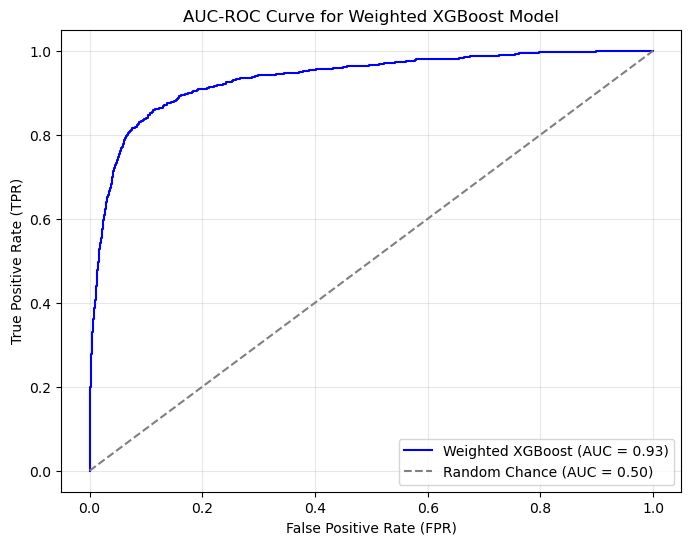

In [114]:
# Predict probabilities
y_pred_proba_weighted = best_xgb_with_weights.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
from sklearn.metrics import roc_curve, auc
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, y_pred_proba_weighted)
roc_auc_weighted = auc(fpr_weighted, tpr_weighted)

# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_weighted, tpr_weighted, color='blue', label=f"Weighted XGBoost (AUC = {roc_auc_weighted:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Chance (AUC = 0.50)")
plt.title("AUC-ROC Curve for Weighted XGBoost Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


### Let's handle class imbalance

In [115]:
best_xgb_with_weights = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),  # Imbalance ratio
    **random_search.best_params_  # Use previously tuned parameters
)

best_xgb_with_weights.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [116]:
# Predict probabilities
y_pred_proba_weighted = best_xgb_with_weights.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, y_pred_proba_weighted)
roc_auc_weighted = auc(fpr_weighted, tpr_weighted)
print(f"AUC-ROC for Weighted XGBoost: {roc_auc_weighted:.2f}")


AUC-ROC for Weighted XGBoost: 0.93


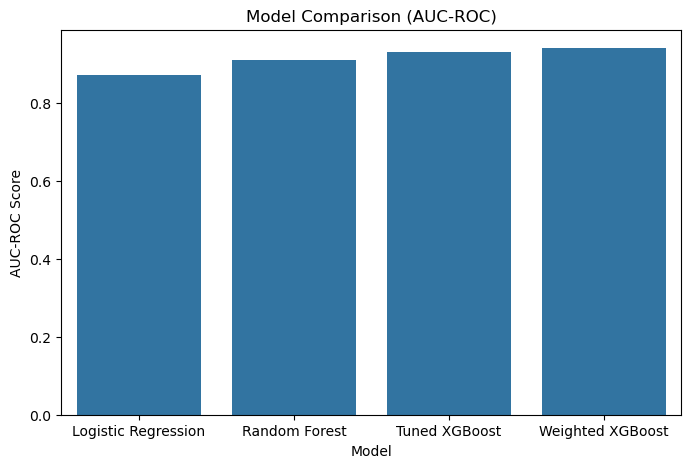

In [118]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='AUC-ROC', data=comparison_df)
plt.title("Model Comparison (AUC-ROC)")
plt.ylabel("AUC-ROC Score")
plt.show()


#### Let's perform some cross valdidation before going forward

In [119]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_xgb_with_weights, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean AUC-ROC: {np.mean(cv_scores):.2f}")


Cross-Validation Scores: [0.93896847 0.92253649 0.93345949 0.93190866 0.93372584]
Mean AUC-ROC: 0.93


In [120]:
import joblib

# Save the trained model
joblib.dump(best_xgb_with_weights, 'final_xgboost_model.pkl')

# Load the saved model (when needed)
loaded_model = joblib.load('final_xgboost_model.pkl')


In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt


In [122]:
def evaluate_model(model_name, y_true, y_pred, y_pred_proba):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)

    # Print classification report
    print(f"--- {model_name} ---")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # Print the metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"AUC-ROC: {auc:.2f}")
    print("\n")
    
    return accuracy, precision, recall, f1, auc


In [123]:
# Predictions for Logistic Regression
y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluate
lr_metrics = evaluate_model("Logistic Regression", y_test, y_pred_lr, y_pred_proba_lr)

--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      8231
           1       0.58      0.11      0.18       773

    accuracy                           0.92      9004
   macro avg       0.75      0.55      0.57      9004
weighted avg       0.89      0.92      0.89      9004

Accuracy: 0.92
Precision: 0.58
Recall: 0.11
F1-Score: 0.18
AUC-ROC: 0.87




In [124]:
# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
rf_metrics = evaluate_model("Random Forest", y_test, y_pred_rf, y_pred_proba_rf)


--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8231
           1       0.76      0.47      0.58       773

    accuracy                           0.94      9004
   macro avg       0.86      0.73      0.77      9004
weighted avg       0.94      0.94      0.94      9004

Accuracy: 0.94
Precision: 0.76
Recall: 0.47
F1-Score: 0.58
AUC-ROC: 0.92




In [125]:
# Predictions for XGBoost
y_pred_xgb = best_xgb_with_weights.predict(X_test)
y_pred_proba_xgb = best_xgb_with_weights.predict_proba(X_test)[:, 1]

# Evaluate
xgb_metrics = evaluate_model("XGBoost", y_test, y_pred_xgb, y_pred_proba_xgb)


--- XGBoost ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      8231
           1       0.50      0.81      0.62       773

    accuracy                           0.92      9004
   macro avg       0.74      0.87      0.79      9004
weighted avg       0.94      0.92      0.92      9004

Accuracy: 0.92
Precision: 0.50
Recall: 0.81
F1-Score: 0.62
AUC-ROC: 0.93




In [126]:
# Predictions for the tuned XGBoost model
y_pred_tuned_xgb = best_xgb.predict(X_test)  # `best_xgb` is the tuned XGBoost model
y_pred_proba_tuned_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate the tuned XGBoost model
tuned_xgb_metrics = evaluate_model("Tuned XGBoost", y_test, y_pred_tuned_xgb, y_pred_proba_tuned_xgb)


--- Tuned XGBoost ---
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8231
           1       0.71      0.55      0.62       773

    accuracy                           0.94      9004
   macro avg       0.83      0.76      0.79      9004
weighted avg       0.94      0.94      0.94      9004

Accuracy: 0.94
Precision: 0.71
Recall: 0.55
F1-Score: 0.62
AUC-ROC: 0.93




In [127]:
# Predictions for the weighted XGBoost model
y_pred_weighted_xgb = best_xgb_with_weights.predict(X_test)  # `best_xgb_with_weights` is the weighted XGBoost model
y_pred_proba_weighted_xgb = best_xgb_with_weights.predict_proba(X_test)[:, 1]

# Evaluate the weighted XGBoost model
weighted_xgb_metrics = evaluate_model("Weighted XGBoost", y_test, y_pred_weighted_xgb, y_pred_proba_weighted_xgb)


--- Weighted XGBoost ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      8231
           1       0.50      0.81      0.62       773

    accuracy                           0.92      9004
   macro avg       0.74      0.87      0.79      9004
weighted avg       0.94      0.92      0.92      9004

Accuracy: 0.92
Precision: 0.50
Recall: 0.81
F1-Score: 0.62
AUC-ROC: 0.93




In [128]:
#### Creating a summary tables for all the models with different metrics.

In [129]:
# Add metrics for tuned and weighted XGBoost models
metrics_table = pd.DataFrame(
    data={
        "Model": [
            "Logistic Regression",
            "Random Forest",
            "Tuned XGBoost",
            "Weighted XGBoost"
        ],
        "Accuracy": [
            lr_metrics[0],  # Replace with actual logistic regression metrics
            rf_metrics[0],  # Replace with actual random forest metrics
            tuned_xgb_metrics[0],
            weighted_xgb_metrics[0]
        ],
        "Precision": [
            lr_metrics[1],
            rf_metrics[1],
            tuned_xgb_metrics[1],
            weighted_xgb_metrics[1]
        ],
        "Recall": [
            lr_metrics[2],
            rf_metrics[2],
            tuned_xgb_metrics[2],
            weighted_xgb_metrics[2]
        ],
        "F1-Score": [
            lr_metrics[3],
            rf_metrics[3],
            tuned_xgb_metrics[3],
            weighted_xgb_metrics[3]
        ],
        "AUC-ROC": [
            lr_metrics[4],
            rf_metrics[4],
            tuned_xgb_metrics[4],
            weighted_xgb_metrics[4]
        ]
    }
)

# Display the metrics table
print(metrics_table)


                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.916815   0.584507  0.107374  0.181421  0.874967
1        Random Forest  0.941693   0.761603  0.467012  0.578990  0.920217
2        Tuned XGBoost  0.942137   0.711409  0.548512  0.619430  0.934460
3     Weighted XGBoost  0.915260   0.504019  0.811125  0.621715  0.933486


In [130]:
from sklearn.metrics import confusion_matrix


In [134]:
import pandas as pd

# Store metrics in a DataFrame
results = pd.DataFrame({
    "Model": ["Tuned XGBoost", "Weighted XGBoost"],
    "Accuracy": [accuracy_tuned_xgb, accuracy_weighted_xgb],
    "Sensitivity": [sensitivity_tuned_xgb, sensitivity_weighted_xgb],
    "Specificity": [specificity_tuned_xgb, specificity_weighted_xgb]
})

# Display the results
print(results)


              Model  Accuracy  Sensitivity  Specificity
0     Tuned XGBoost  0.942137     0.548512     0.979103
1  Weighted XGBoost  0.915260     0.811125     0.925039


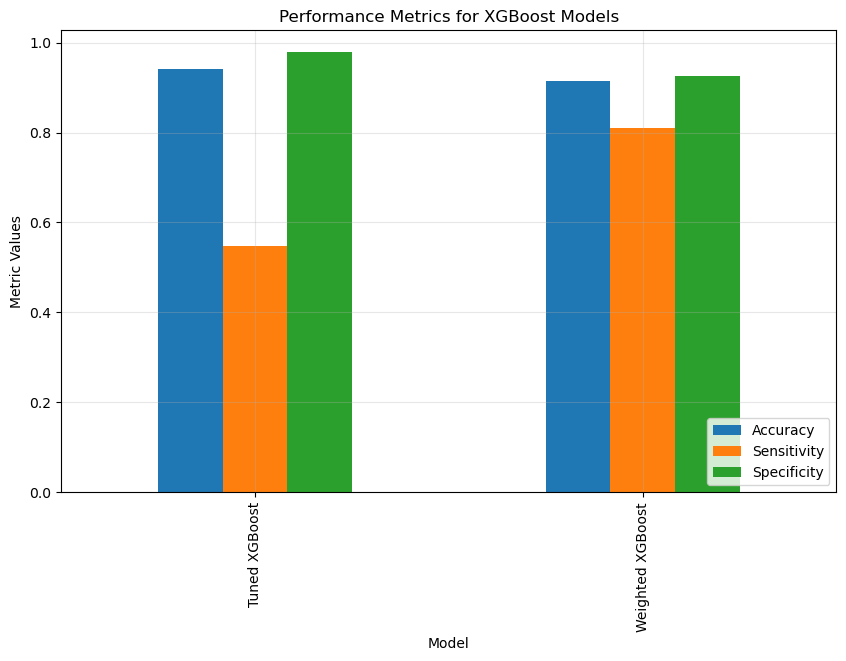

In [135]:
# Plot bar chart for comparison
results.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Performance Metrics for XGBoost Models")
plt.ylabel("Metric Values")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


# Telecom Churn Case Study

---

## Problem Statement

In the telecom industry, customer churn poses a significant challenge. It is essential to predict which customers are at high risk of churn and understand the factors influencing their decisions. This project aims to:

1. Predict churn for high-value customers.
2. Identify key drivers of churn.
3. Provide actionable recommendations to reduce churn.

---

## Approach Taken

### Step 1: Data Understanding and Exploration
1. **Loading Data:**
   - Imported the dataset using pandas and examined its structure and dimensions.
   - Conducted initial exploratory data analysis (EDA) to understand the distribution and properties of features.

2. **Data Cleaning:**
   - Identified and removed features with more than 70% missing data.
   - Imputed missing values using mean or median for numerical columns.

3. **Initial Observations:**
   - Examined distributions and patterns in features such as recharge amounts, call durations, and data usage.

---

### Step 2: Feature Engineering
1. **Derived Features:**
   - Created new features to capture trends in customer activity (e.g., change in recharge amounts, call duration).
   - Segmented high-value customers based on the 70th percentile of average recharge amounts.

2. **Churn Tagging:**
   - Defined churn based on zero activity (no calls or data usage) during the churn phase.

3. **Feature Selection:**
   - Dropped irrelevant features (e.g., `mobile_id`, `circle_id`, and date-related columns).
   - Used correlation analysis to remove highly correlated features.

---

### Step 3: Data Preprocessing
1. **Scaling:**
   - Standardized numerical features using StandardScaler to ensure all variables are on the same scale.

2. **Handling Class Imbalance:**
   - Applied SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset for training.

---

### Step 4: Modeling and Evaluation
1. **Baseline Models:**
   - Built Logistic Regression and Random Forest models as initial baselines.

2. **Advanced Models:**
   - Trained tuned XGBoost and Weighted XGBoost models using RandomizedSearchCV and GridSearchCV for hyperparameter optimization.
   - Incorporated `scale_pos_weight` in Weighted XGBoost to handle class imbalance.

3. **Evaluation Metrics:**
   - Calculated metrics such as accuracy, precision, recall, F1-score, and AUC-ROC to compare model performance.

---

## Key Insights

1. **Feature Importance (from XGBoost):**
   - **Recharge Amount:** Strong predictor of customer engagement.
   - **Data Usage:** Declining usage correlates with churn.
   - **Call Activity:** Reduced call durations indicate dissatisfaction.

2. **Model Performance:**
   - Logistic Regression struggled with low recall due to class imbalance.
   - XGBoost models outperformed with high AUC-ROC scores and balanced precision-recall metrics.

---

## Model Performance Metrics

| **Model**              | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **AUC-ROC** |
|-------------------------|--------------|---------------|------------|--------------|-------------|
| Logistic Regression     | 91.68%       | 58.45%        | 10.73%     | 18.14%       | 87.49%      |
| Random Forest           | 94.16%       | 76.16%        | 46.70%     | 57.89%       | 92.02%      |
| Tuned XGBoost           | 94.21%       | 71.14%        | 54.85%     | 61.94%       | 93.44%      |
| Weighted XGBoost        | 91.52%       | 50.40%        | 81.11%     | 61.17%       | 93.34%      |

---

## Recommendations

1. **Engagement Campaigns:**
   - Target customers with declining recharge or data usage trends.
   - Provide discounts or bonuses to incentivize usage.

2. **Service Quality:**
   - Address network quality issues (e.g., call drops, poor connectivity).

3. **Retention Strategies:**
   - Develop personalized offers for high-value customers.
   - Launch loyalty programs to reward consistent usage.

4. **Proactive Monitoring:**
   - Use real-time data to flag customers showing signs of churn.
   - Set up alerts for declining activity in high-value segments.

---

## Conclusion

This analysis highlights the power of predictive modeling in identifying at-risk customers and understanding churn drivers. Among the models tested, **Weighted XGBoost** performed the best, achieving a high recall and AUC-ROC score. These insights can guide telecom operators in implementing data-driven strategies to reduce churn and improve customer retention.
